<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-January/blob/main/Decision%20Tree/Decision_Tree_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Data - A Decision Tree Approach

## Aim:
The aim of this attempt is to predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree.


In [ ]:
# import library
import ?? as pd
import ?? as np
import ?? as plt
import ?? as sns
import ??.express as px
from ?? import train_test_split
from ?? import tree
from ?? import metrics

load data from given link https://raw.githubusercontent.com/Ramanand-Yadav/DataSet/main/bank.csv

In [ ]:
# Load data file
bank=pd.??('??')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Summay of data

### Categorical Variables :
**[1] job      :** admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur,
               housemaid, unknown, self-employed, student
<br>**[2] marital  :** married, single, divorced
<br>**[3] education:** secondary, tertiary, primary, unknown
<br>**[4] default  :** yes, no
<br>**[5] housing  :** yes, no
<br>**[6] loan     :** yes, no 
<br>**[7] deposit  :** yes, no ** (Dependent Variable)**
<br>**[8] contact  :** unknown, cellular, telephone
<br>**[9] month    :** jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec
<br>**[10] poutcome:** unknown, other, failure, success

### Numerical Variables:
**[1] age 
<br>[2] balance
<br>[3] day
<br>[4] duration
<br>[5] campaign
<br>[6] pdays
<br>[7] previous**

In [ ]:
# Check if the data set contains any null values - Nothing found!
bank.??.??

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
bank.??

(11162, 17)

In [ ]:
bank.??

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


###Numerical Data

In [ ]:
numCol = ['age','balance','day','duration','campaign','pdays','previous']
fig, axe = plt.subplots(??, ??, figsize=(18, 18))
for index, col in ??(numCol):
  # print(index, type(col))
  sns.boxplot(ax=axe[??, ??], ??)
  sns.??(ax=axe[??, ??], x=bank[col])
  axe[index, 0].set_title(col)
  axe[index, 1].set_title(col)
  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

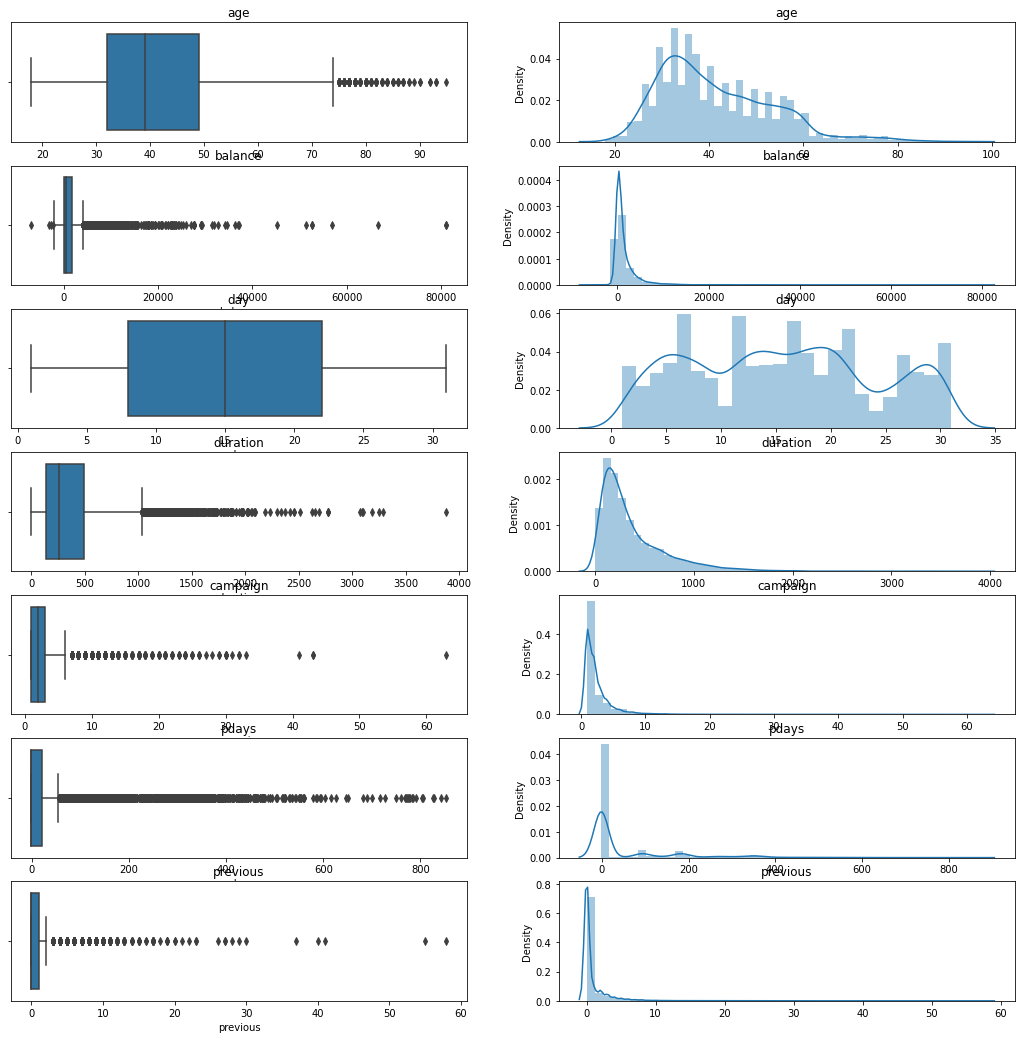

### categorical data

In [ ]:
# Make a copy for parsing
bank_data = bank.??()

#### job 

In [ ]:
px.histogram(??)

In [ ]:
# Explore People who made a deposit Vs Job category
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:} : {:}".format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

management : 1301
blue-collar : 708
technician : 840
admin. : 631
services : 369
retired : 516
self-employed : 187
student : 269
unemployed : 202
entrepreneur : 123
housemaid : 109
unknown : 34


In [ ]:
px.histogram(??, x=??, color = ??)

In [ ]:
# Different types of job categories and their counts
bank_data.job.??

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
# Combine similar jobs into categiroes
# management , admin =: white-collar
# service, housemaid =: pink-coller
# retired, student, unemployed =: other
bank_data['job'] = bank_data['job'].replace(['??', '??'], '??')
bank_data['job'] = bank_data['job'].replace(['services','??'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', ?? ??, 'unknown'], ??)

In [ ]:
# New value counts
bank_data.job.??

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [ ]:
px.histogram(bank_data, x=??)

In [ ]:
px.histogram(bank_data, x=??, color = ??)

#### poutcome

In [ ]:
bank_data.poutcome.??

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [ ]:
sns.??(bank_data[??])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



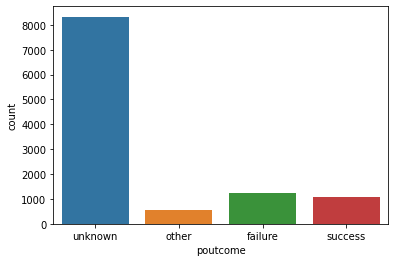

In [ ]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data[??].replace([??] , 'unknown')
bank_data.??.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [ ]:
sns.??(bank_data[??])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



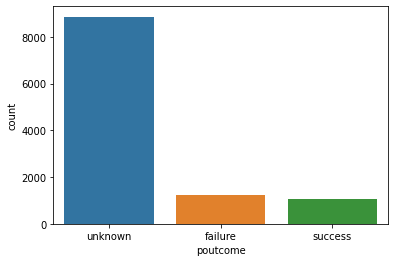

#### contact

In [ ]:
bank_data.contact.??

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [ ]:
sns.??(bank_data[??])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



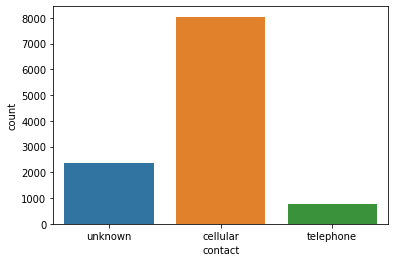

In [ ]:
# Drop 'contact', as every participant has been contacted. 
bank_data.??('contact', ??, inplace=True)

In [ ]:
# new dataset
bank_data.??

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,pink-collar,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes


####  default

In [ ]:
bank_data['??'].??

no     10994
yes      168
Name: default, dtype: int64

In [ ]:
??['default'].??.plot(kind=??, autopct='%.2f')

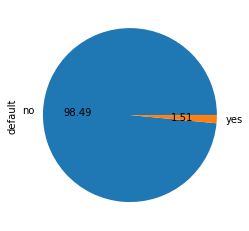

In [ ]:
# values for "default" : yes/no
# yes : 1, No : 0
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':??, 'no':??} )
# drop default feature
bank_data.??('??', axis=??, ??= True)


In [ ]:
bank_data.??

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat
0,59,white-collar,married,secondary,2343,yes,no,5,may,1042,1,-1,0,unknown,yes,0
1,56,white-collar,married,secondary,45,no,no,5,may,1467,1,-1,0,unknown,yes,0
2,41,technician,married,secondary,1270,yes,no,5,may,1389,1,-1,0,unknown,yes,0
3,55,pink-collar,married,secondary,2476,yes,no,5,may,579,1,-1,0,unknown,yes,0
4,54,white-collar,married,tertiary,184,no,no,5,may,673,2,-1,0,unknown,yes,0


#### housing

In [ ]:
??['housing'].??

no     5881
yes    5281
Name: housing, dtype: int64

In [ ]:
bank_data['??'].??.plot(kind=??, autopct='%.2f')

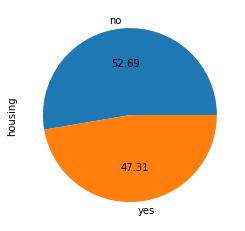

In [ ]:
# values for "housing" : yes/no
# yes : 1
# no : 0
bank_data["housing_cat"]=bank_data['??'].map({'yes':??, 'no':??})
# drop housing Faeture
bank_data.??('housing', axis=??, ??= True)

In [ ]:
bank_data.??

,age,job,marital,education,balance,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat,housing_cat
0,59,white-collar,married,secondary,2343,no,5,may,1042,1,-1,0,unknown,yes,0,1
1,56,white-collar,married,secondary,45,no,5,may,1467,1,-1,0,unknown,yes,0,0
2,41,technician,married,secondary,1270,no,5,may,1389,1,-1,0,unknown,yes,0,1
3,55,pink-collar,married,secondary,2476,no,5,may,579,1,-1,0,unknown,yes,0,1
4,54,white-collar,married,tertiary,184,no,5,may,673,2,-1,0,unknown,yes,0,0


####  loan

In [ ]:
bank_data['loan'].??

no     9702
yes    1460
Name: loan, dtype: int64

In [ ]:
bank_data[??].??.plot(kind=??, autopct='%.2f')

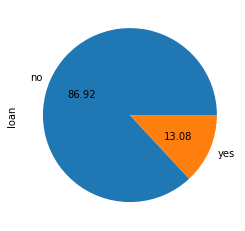

In [ ]:
# values for "loan" : yes/no
# yes : 1
# no : 0
bank_data["loan_cat"] = bank_data[??].??({'yes':??, 'no':??})
# drop loan feature
bank_data.??('loan', ??=1, inplace=??)

In [ ]:
bank_data.??

,age,job,marital,education,balance,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat,housing_cat,loan_cat
0,59,white-collar,married,secondary,2343,5,may,1042,1,-1,0,unknown,yes,0,1,0
1,56,white-collar,married,secondary,45,5,may,1467,1,-1,0,unknown,yes,0,0,0
2,41,technician,married,secondary,1270,5,may,1389,1,-1,0,unknown,yes,0,1,0
3,55,pink-collar,married,secondary,2476,5,may,579,1,-1,0,unknown,yes,0,1,0
4,54,white-collar,married,tertiary,184,5,may,673,2,-1,0,unknown,yes,0,0,0


####  month, day 

In [ ]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' 
bank_data.??('month', axis=??, inplace=??)
bank_data.drop(??, ??=1, ?=True)

In [ ]:
bank_data.??

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,deposit,default_cat,housing_cat,loan_cat
0,59,white-collar,married,secondary,2343,1042,1,-1,0,unknown,yes,0,1,0
1,56,white-collar,married,secondary,45,1467,1,-1,0,unknown,yes,0,0,0
2,41,technician,married,secondary,1270,1389,1,-1,0,unknown,yes,0,1,0
3,55,pink-collar,married,secondary,2476,579,1,-1,0,unknown,yes,0,1,0
4,54,white-collar,married,tertiary,184,673,2,-1,0,unknown,yes,0,0,0


####  deposit 

In [ ]:
bank_data['deposit'].??

no     5873
yes    5289
Name: deposit, dtype: int64

In [ ]:
bank_data[??].??.plot(kind=??, autopct='%.2f')

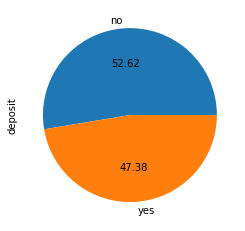

In [ ]:
# values for "deposit" : yes/no
# yes : 1
# no : 0
bank_data["deposit_cat"] = bank_data[??].map({'yes':??, 'no':??})
# drop deposit feature
bank_data.??('deposit', axis=??, inplace=??)

In [ ]:
bank_data.??

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat
0,59,white-collar,married,secondary,2343,1042,1,-1,0,unknown,0,1,0,1
1,56,white-collar,married,secondary,45,1467,1,-1,0,unknown,0,0,0,1
2,41,technician,married,secondary,1270,1389,1,-1,0,unknown,0,1,0,1
3,55,pink-collar,married,secondary,2476,579,1,-1,0,unknown,0,1,0,1
4,54,white-collar,married,tertiary,184,673,2,-1,0,unknown,0,0,0,1


####  pdays

In [ ]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(bank_data[bank_data.??==-1]))
print("Maximum values on padys    :", bank_data[??].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [ ]:
# Map pdays=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [ ]:
bank_data.??

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat
0,59,white-collar,married,secondary,2343,1042,1,10000,0,unknown,0,1,0,1
1,56,white-collar,married,secondary,45,1467,1,10000,0,unknown,0,0,0,1
2,41,technician,married,secondary,1270,1389,1,10000,0,unknown,0,1,0,1
3,55,pink-collar,married,secondary,2476,579,1,10000,0,unknown,0,1,0,1
4,54,white-collar,married,tertiary,184,673,2,10000,0,unknown,0,0,0,1


In [ ]:
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['??'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.??('pdays', axis=1, inplace = True)

In [ ]:
bank_data.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,0.000100
11159,32,technician,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0,0.000100


###  Convert to dummy values 

In [ ]:
# Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=??, ?? = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
??.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [ ]:
bank_with_dummies.??

(11162, 27)

In [ ]:
bank_with_dummies.??

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,0.174162,0.029385,0.140208,0.107239,0.036284,0.163322,0.349400,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,0.379266,0.168892,0.347218,0.309431,0.187004,0.369676,0.476802,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observations on whole population

In [ ]:
# Scatterplot showing age and balance
bank_with_dummies.??(??='scatter', x=??, ??='balance');

# Across all ages, majority of people have savings of less than 20000.

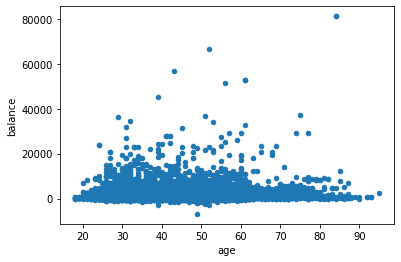

#### Analysis on people who sign up for a term deposite

In [ ]:
# People who sign up to a term deposite
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,0.133863,0.023256,0.193042,0.090376,0.035356,0.158820,0.365286,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,0.340537,0.150729,0.394723,0.286747,0.184696,0.365543,0.481556,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# People signed up to a term deposite having a personal loan (loan_cat) and housing loan (housing_cat)
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.loan_cat) & (bank_with_dummies.housing_cat)])

265

In [ ]:
# People signed up to a term deposite with a credit default 
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.default_cat ==1)])

52

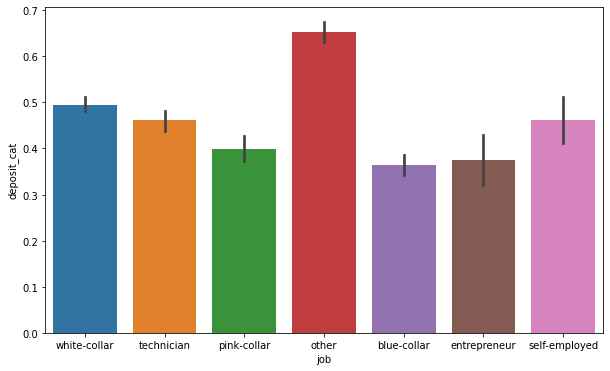

In [ ]:
# Bar chart of job Vs deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = bank_data)

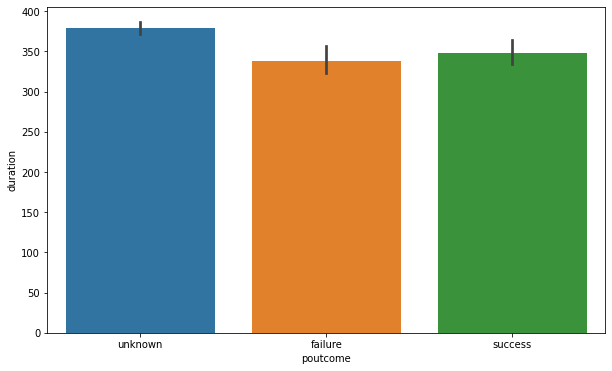

In [ ]:
# Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

> ## Classification

In [ ]:
# make a copy
bankcl = bank_with_dummies

In [ ]:
# The Correltion matrix
corr = bankcl.??
??

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,-0.066567,0.024176,0.296418,-0.027942,-0.023163,-0.082716,-0.080122,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,-0.046220,0.005039,0.050744,-0.041063,0.020264,0.003802,0.013780,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,0.029986,-0.000908,0.010680,0.005345,0.013506,-0.010440,-0.031980,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,0.005522,0.013883,-0.050212,0.011958,0.001776,0.021738,0.001944,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,-0.039939,-0.022470,0.031191,-0.028623,-0.002338,0.002035,0.034929,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,0.022779,0.022060,-0.018130,-0.007173,0.007493,0.003109,-0.013425,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,0.189848,0.011492,-0.233309,0.043884,-0.016903,0.006551,-0.012111,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,0.057956,0.042631,-0.096196,0.014969,0.004299,0.006864,-0.007871,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,-0.100840,-0.034443,0.144408,-0.051717,-0.004707,-0.011557,0.031621,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,-0.018514,0.006251,0.024356,-0.001183,-0.008226,-0.007412,0.004516,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


In [ ]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(??, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title(??)

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

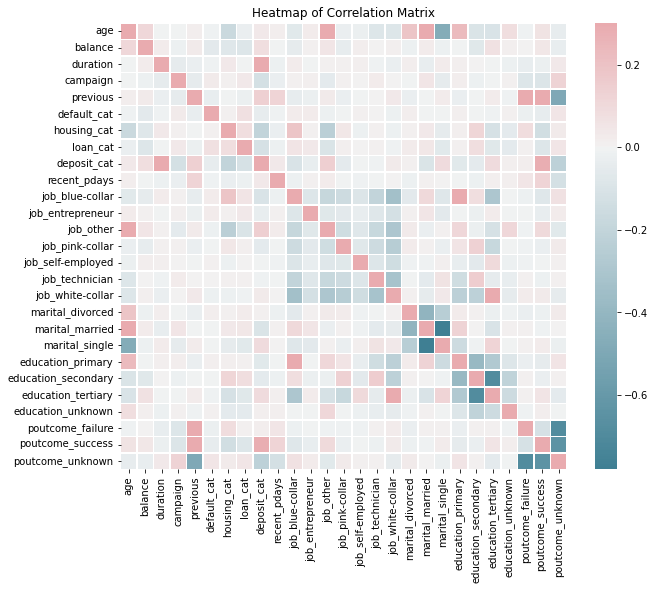

In [ ]:
# Extract the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = ??)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


> ## Build the Data Model

In [ ]:
# Train-Test split: 20% test data
data_drop_deposite = bankcl.??('deposit_cat', 1)
label = ??.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, ?? = 0.2, random_state = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
# Decision tree with depth = 2
dt2 = ??(random_state=1, ??=2)

dt2.fit(??, ??)

dt2_score_train = dt2.score(??, ??)
print("Training score: ",??)

dt2_score_test = dt2.score(data_test, ??)
print("Testing score: ",??)

Training score:  0.7285250307985217
Testing score:  0.7268248992386923


In [ ]:
# Decision tree with depth = 3
??
??
??
??
??

Training score:  0.770411020271027
Testing score:  0.7572772055530677


In [ ]:
# Decision tree with depth = 4
??
??
??
??

Training score:  0.7885541494008288
Testing score:  0.774294670846395


In [ ]:
??
??
??
??
??

Training score:  0.8080412140217269
Testing score:  0.7796686072548141


In [ ]:
# Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier()

dt1.fit(??, ??)
dt1_score_train = dt1.score(??, ??)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(??, ??)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7321988356471115


#### Compare Training and Testing scores for various tree depths used

In [ ]:
print('{:10} {:20} {:20}'.format('??', '??','??'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, ??, ??))
print('{:1} {:>25} {:>20}'.format(3, ??, ??))
??
??
??

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7285250307985217   0.7268248992386923
3         0.770411020271027   0.7572772055530677
4        0.7885541494008288    0.774294670846395
6        0.8080412140217269   0.7796686072548141
max                     1.0   0.7321988356471115


In [ ]:
plt.figure(figsize=(18, 10))
from sklearn import ??
tree.plot_tree(??, max_depth=2, filled=True)
??


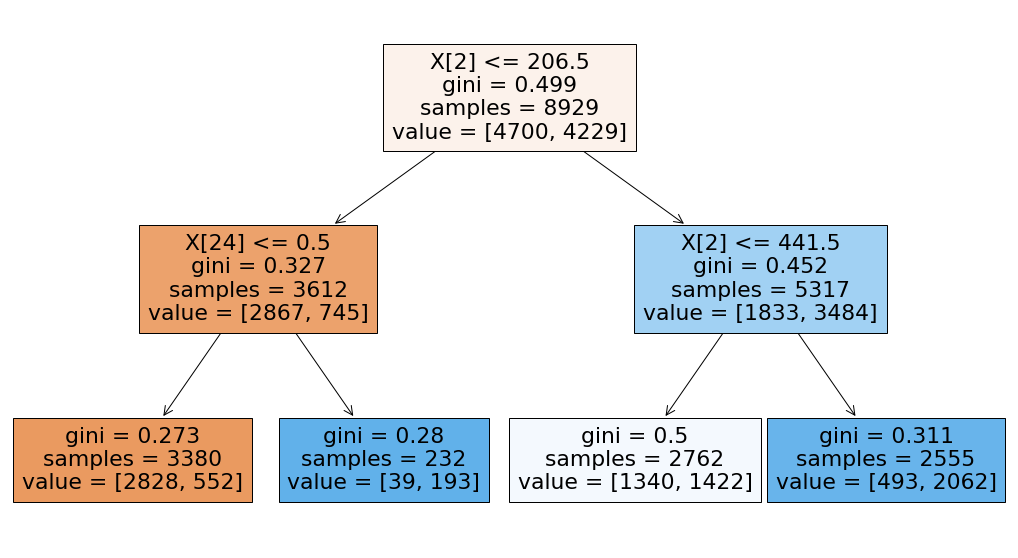

In [ ]:
# Two classes: 0 = not signed up,  1 = signed up
??

array([0, 1])

In [ ]:
# Create a feature vector
features = data_drop_deposite.??.tolist()

??

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

##HyperParameter Tunning 
**GridSearch CV**

In [ ]:
from sklearn.tree import ??
from ?? import ??

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    ?? = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 10)}
    # decision tree model
    ??=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=??)
    #fit model to data
    dtree_gscv.??(X, y)
    return dtree_gscv.best_params_

In [ ]:
# call dtree_grid_search with nfolds = 5
??(dtree_grid_search(data_train, ??, ??))

{'criterion': 'entropy', 'max_depth': 6}


In [ ]:
# make DecisionTreeClassifier with best_params_  and train your model
hDt = DecisionTreeClassifier(??, ??=6)
hDt.??(??, label_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [ ]:
# find out training and testing accuracy
hDt_score_train = hDt.??(data_train, ??)
print("Training score: ", hDt_score_train)
hDt_score_test = hDt.??(data_test, ??)
print("Testing score: ", ??)

Training score:  0.8071452570276627
Testing score:  0.7819077474249888


In [ ]:
fi = hDt.??

l = len(features)

for i in range(0, len(??)):
  print('{:.<20} {:3} '.format(??[i], ??[i]))

age................. 0.0322194077868486 
balance............. 0.034645817621518214 
duration............ 0.5850070911505163 
campaign............ 0.017328135495228898 
previous............ 0.015113434294132418 
default_cat......... 0.0 
housing_cat......... 0.103014050777686 
loan_cat............ 0.0019087945046288106 
recent_pdays........ 0.015399467520187043 
job_blue-collar..... 0.0 
job_entrepreneur.... 0.0 
job_other........... 0.0 
job_pink-collar..... 0.0 
job_self-employed... 0.0 
job_technician...... 0.0 
job_white-collar.... 0.0008448795174435656 
marital_divorced.... 0.0 
marital_married..... 0.004593648690515507 
marital_single...... 0.00452510545265586 
education_primary... 0.0 
education_secondary. 0.0 
education_tertiary.. 0.0 
education_unknown... 0.0 
poutcome_failure.... 0.0005306766764535086 
poutcome_success.... 0.1848694905121852 
poutcome_unknown.... 0.0 


## Predictions

In [ ]:
# According to feature importance results, most importtant feature is the "Duration"
# Let's calculte statistics on Duration
print("Mean duration   : ", ??)
print("Maximun duration: ", ??)
print("Minimum duration: ", ??)

Mean duration   :  371.99381831213043
Maximun duration:  3881
Minimum duration:  2


In [ ]:
# Predict: Successful deposite with a call duration = 371 sec

print(dt2.predict_proba(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
# column 0: probability for class 0 (not signed for term deposite) & column 1: probability for class 1
# Probability of Successful deposite = 0.51484432

[[0.48515568 0.51484432]]
[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
# Predict: Successful deposite with a maximun call duration = 3881 sec

print(hDt.predict_proba(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(hDt.predict(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.01219512 0.98780488]]
[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
# Get a row with poutcome_success = 1
#bank_with_dummies[(bank_with_dummies.poutcome_success == 1)]
data_drop_deposite.iloc[985]

age                      46.000000
balance                3354.000000
duration                522.000000
campaign                  1.000000
previous                  1.000000
default_cat               0.000000
housing_cat               1.000000
loan_cat                  0.000000
recent_pdays              0.005747
job_blue-collar           0.000000
job_entrepreneur          0.000000
job_other                 1.000000
job_pink-collar           0.000000
job_self-employed         0.000000
job_technician            0.000000
job_white-collar          0.000000
marital_divorced          1.000000
marital_married           0.000000
marital_single            0.000000
education_primary         0.000000
education_secondary       1.000000
education_tertiary        0.000000
education_unknown         0.000000
poutcome_failure          0.000000
poutcome_success          1.000000
poutcome_unknown          0.000000
Name: 985, dtype: float64

In [ ]:
# Predict: Probability for above

print(dt2.predict_proba(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))
print(hDt.predict_proba(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]
[[0. 1.]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
# Make predictions on the test set
preds = hDt.??(data_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.??(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = hDt.??(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, ??)))


Accuracy score: 
0.7819077474249888

Area Under Curve: 
0.8576485064903728


##confusion matrix 

In [ ]:
# import confusion_matrics
from ?? import ??


In [ ]:
# print confusion matrix for training dataset
y_predTrain = hDt.predict(??)
??(label_train, ??)

array([[3791,  909],
       [ 813, 3416]])

In [ ]:
# print confusion matrix for testin dataset 
ypredTest = hDt.??(data_test)
??(label_test,??)

array([[912, 261],
       [227, 833]])

**calculate precision , recall , and f1 score ⏳⏳⏳⏳**
